# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

### The Imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)
data_source='yahoo'

In [3]:
BAC = data.DataReader("BAC", data_source=data_source, start=start, end=end)

BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,33.584084
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,33.227398
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,33.270195
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,33.220268
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,33.241676


In [4]:
C = data.DataReader("C", data_source=data_source, start=start, end=end)

C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,361.662140
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870960.0,354.985077
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143160.0,356.746063
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370210.0,356.746063
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680740.0,355.058380


In [5]:
GS = data.DataReader("GS", data_source=data_source, start=start, end=end)

GS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,102.626816
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,101.209320
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,101.169456
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,102.602928
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,103.837311


In [6]:
JPM = data.DataReader("JPM", data_source=data_source, start=start, end=end)

JPM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,26.151625
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.000692
2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.079443
2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,26.263205
2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,26.689753


In [7]:
WFC = data.DataReader("WFC", data_source, start, end)

WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.242821
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.008030
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,19.985819
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.103220
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.100046


In [8]:
MS = data.DataReader("MS", data_source, start, end)

MS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,35.558952
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,35.583359
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,35.680923
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,35.717506
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,36.095596


Creating a list of the ticker symbols (as strings) in alphabetical order.

In [9]:
tickers = ["BAC", "C", "GS", "JPM", "WFC", "MS"]

We're concatenating the bank dataframes together using pd.concat.

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584084   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227398   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270195   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220268   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241676   

                     C                                      ...        WFC  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                    MS                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558952  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583359  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680923  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717506  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095596  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242821  
2006-01-04  31.530001  10870000.0  20.008030  
2006-01-05  31.495001  10158000.0  19.985819  
2006-01-06  31.680000   8403800.0  20.103220  
2006-01-09  31.674999   5619600.0  20.100046  

[5 rows x 36 columns]

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
WFC     89.300003
MS      58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [14]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [15]:
returns

,BAC Return,C Return,GS Return,JPM Return,WFC Return,MS Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

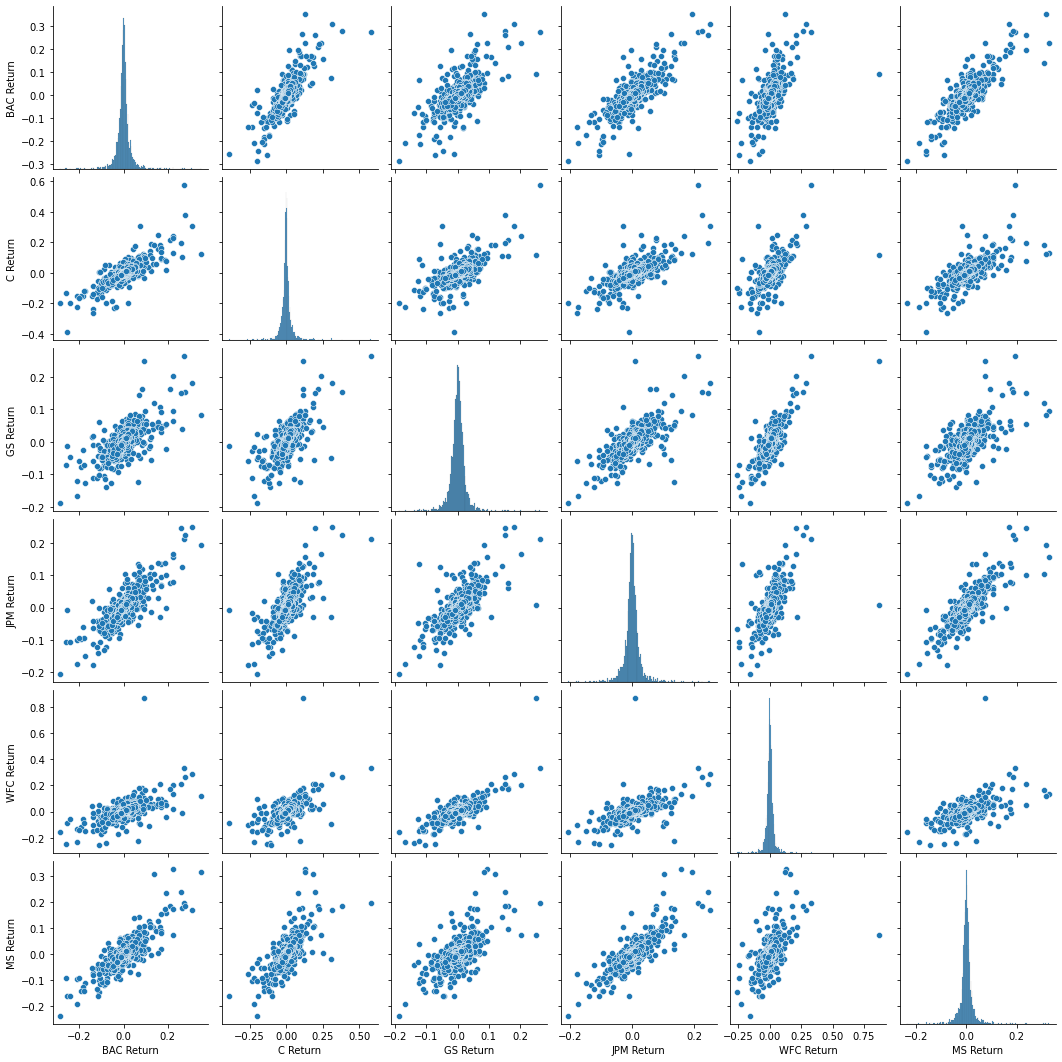

In [16]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [17]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
WFC Return   2008-10-09
MS Return    2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [18]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
WFC Return   2008-10-13
MS Return    2008-07-16
dtype: datetime64[ns]

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [19]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
WFC Return    0.037819
MS Return     0.030238
dtype: float64

In [20]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
WFC Return    0.016249
MS Return     0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

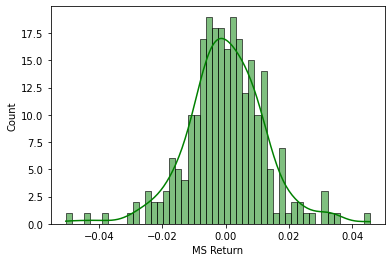

In [22]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',
            bins=50, kde=True)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Return', ylabel='Count'>

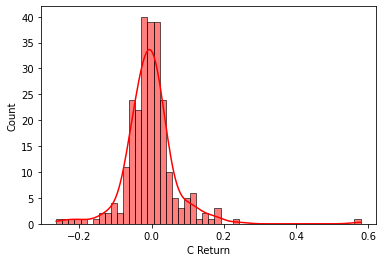

In [23]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',
            bins=50, kde=True)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<AxesSubplot:xlabel='Date'>

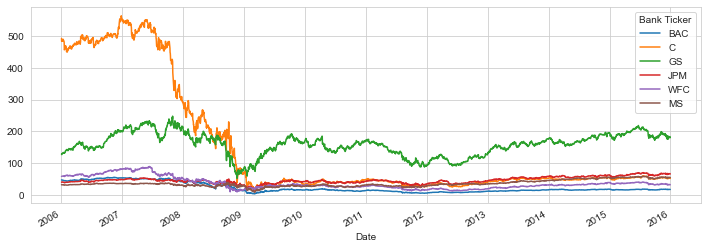

In [ ]:
bank_stocks.xs(key='Close', axis=1,level='Stock Info').plot(figsize=(12,4))

In [ ]:
bank_stocks.xs(key='Close', axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

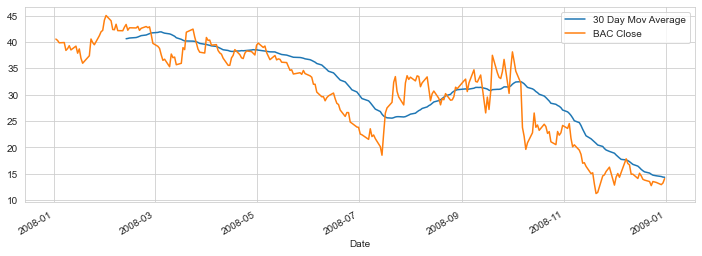

In [ ]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01': '2009-01-01'].rolling(window=30).mean().plot(label='30 Day Mov Average')
BAC['Close'].loc['2008-01-01': '2009-01-01'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [ ]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

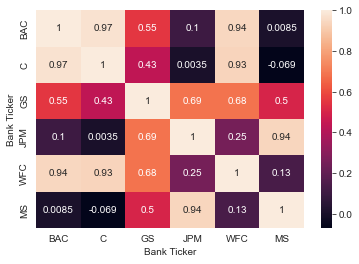

In [ ]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)


** Optional: Use seaborn's clustermap to cluster the correlations together:**

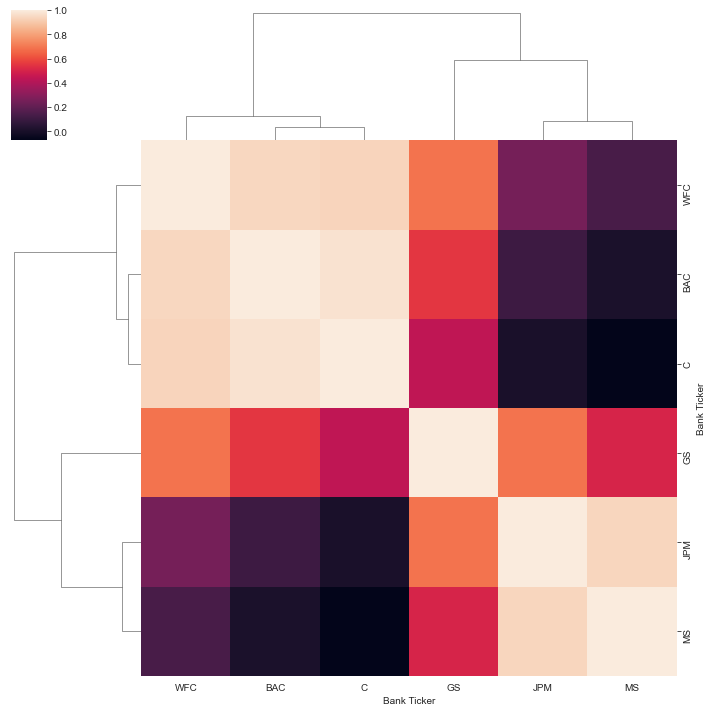

In [ ]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr())

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [ ]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']

In [ ]:
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [ ]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [ ]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')